### Heat Map

In [1]:
# Import Library

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# Set Config
CONFIG = {
    "data_dir": "./TPM.csv"
    , "genes": ["GADD45G", "CDC25B", "NCAM1", "GRM4", "NGFR", "MAPK14"]
    , "color": sns.diverging_palette(20, 133, l=60, n=24, center="dark")
}

In [3]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0)

In [4]:
# Shape Data
data = np.log2(rawdata+1)

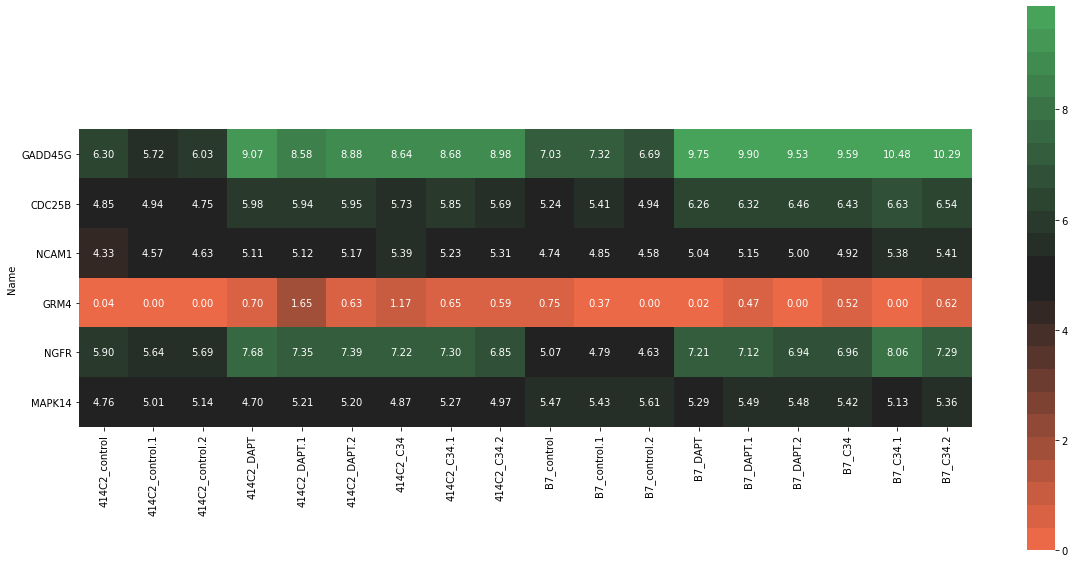

In [5]:
# TPM heatmap
hTPM = data.loc[CONFIG["genes"], :]
plt.figure(figsize=(20, 10))
sns.heatmap(hTPM, cmap=CONFIG["color"], annot=True, fmt=".2f", square=True, robust=True)
plt.savefig("./HeatMap_TPM.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

In [6]:
# Calculating Z score
Zdata = data.loc[CONFIG["genes"], :]
number = len(Zdata.index)
for i in range(number):
    _data = zscore(data.loc[CONFIG["genes"][i], :])
    Zdata.loc[CONFIG["genes"][i], :] = _data

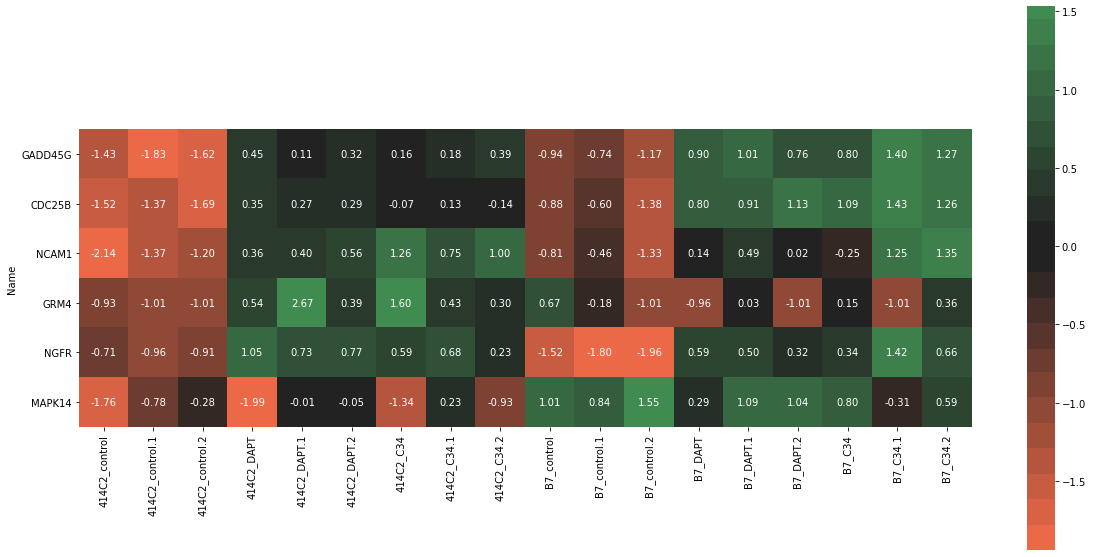

In [7]:
# Z score heat map
plt.figure(figsize=(20, 10))
sns.heatmap(Zdata, cmap=CONFIG["color"], annot=True, fmt=".2f", square=True, robust=True, center=0)
plt.savefig("./HeatMap_Zscore.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)